Project Description:

Collaboration, working together, is a strategy that a range of animals from insects to primates use to survive and be successful. Collaboration has different benefits in different species. Some of the benefits include allowing animals to catch larger prey, increasing vigilance against predators, sharing maternal duties, and defending resources. However, there are also costs associated with collaboration. The costs can include higher levels of parasites/diseases, more competition, and infanticide.

I am modeling collaboration using two types of organisms: collaborators and non-collaborators. I am examining how different pay offs for collaborators will affect the percentage of the population that are collaborators. I will be testing both negative and positive payoffs for the collaborators. While the payoffs of collaborators will change, the payoff for non-collaborators will always be a score of one. Collaborators will be represented by zeros and non-collaborators will be represented by ones. I will use a list of ones and zeros to represent the population. I will compare neighboring organisms in paired sets to calculate the payoff scores. Next, organisms will advance to the following generation based on a tournament system where two individuals are randomly picked and their scores are compared. The individual with the highest score will advance. If the scores are the same, then the first randomly picked individual advances. The scores will be wiped clean with each new generation, so the points do not carry over. I have constrained my population to ten thousand individuals and twenty-five generations, but these parameters can be changed.

I think that collaborators will need a pay off score that is greater than one (which is the payoff score non-collaborators always receive) in order to be represented at all in the population after a few generations. 

In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [56]:
from pandas import*

In [57]:
import random

FUNCTIONS

In [58]:
#making a population of collaborators and non-collaborators
N=100 #size of population
animalList=[] #list of the different types of organisms

def makeAnimals(N):
    for i in range(N):
        animalList.append(random.randint(0,1)) #the type of organisms are randomly determined
    return animalList
#print makeAnimals(N)
#print animalList
#print len(animalList)

In [59]:
#comparing neighboring organisms and assigning a score to each individual for the interaction
scoreList=[] #a list I use in the function to keep track of the scores that result from neighbor interactions
cc=1 #an example of one of the payoffs for collaborator vs collaborator
M=[[cc,0],[1,1]] #payoff matrix
n=0 #place in the list
N=100 #size of the population

def payOffForInteraction(N,n,M):
    n=0
    for k in range(N/2):
    #equations for each possible pair combination
        #collaborator vs collaborator
        if animalList[n]+animalList[n+1]==0:
            scoreList.append(M[0][0])
            scoreList.append(M[0][0])

        #noncollaborator vs noncollaborator
        if animalList[n]+animalList[n+1]==2:
            scoreList.append(M[1][1])
            scoreList.append(M[1][1])
        
        #combination
        if animalList[n]+animalList[n+1]==1:
            if animalList[n]==1:
                scoreList.append(M[1][0])
                scoreList.append(M[0][1])
            else:
                scoreList.append(M[0][1])
                scoreList.append(M[1][0])
    
        #pick in pairs
        n=n+2
    
    return scoreList
#print payOffForInteraction(N,n,M)
#print scoreList

In [60]:
#Next generation
nextGenerationList=[] #the list used in the function to put the individuals that will survive to the next generation
N=100 #population size

def nextGeneration(N):
    for q in range(N): 
        randomOne=random.randint(0,(N-1)) #tournament- selecting two random individuals to compete
        randomTwo=random.randint(0,(N-1))
        while randomOne==randomTwo: #to make sure an individual does not compete against its self
            randomOne=random.randint(0,(N-1))
            randomTwo=random.randint(0,(N-1))
        if (scoreList[randomTwo])>(scoreList[randomOne]):  #comparing the scores of the two competitors
            nextGenerationList.append(animalList[randomTwo])  #if the individual chosen as randomTwo has a higher score than randomOne then randomTwo adv 
        else:
            nextGenerationList.append(animalList[randomOne]) #otherwise the randomOne animal advances
        
    return nextGenerationList
#print nextGeneration(N)
#print len(nextGenerationList)

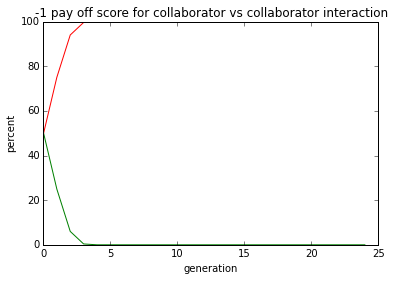

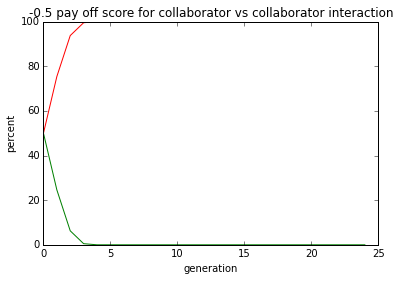

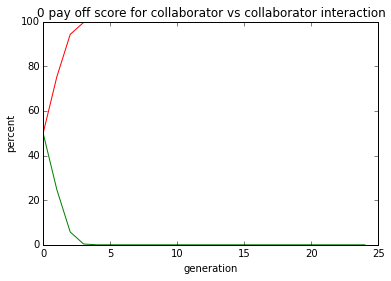

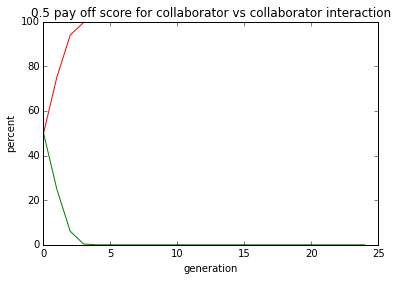

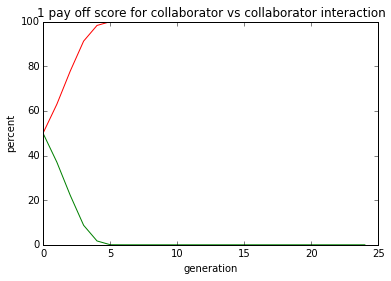

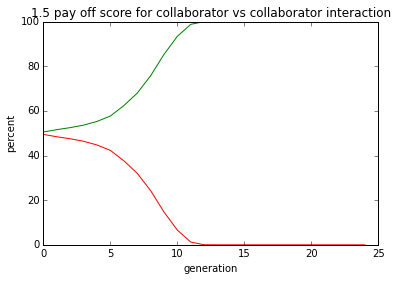

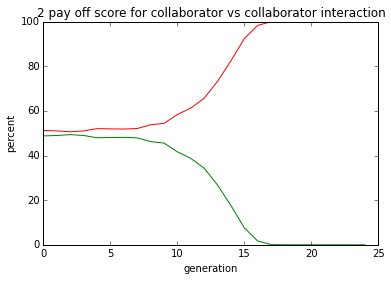

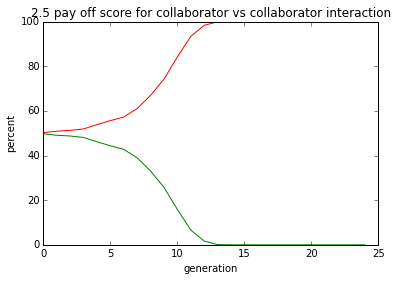

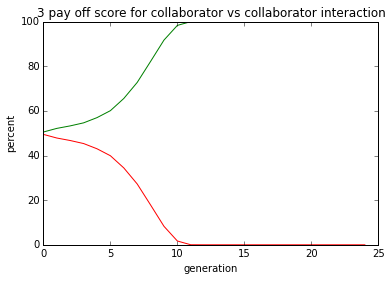

In [76]:
#putting things together
cc=(-1,-.5,0,.5,1,1.5,2,2.5,3) #different payoffs for collaborator vs collaborator
N=5000 #population size
generations=25 #number of generations
n=0 #place in list
animalList=[] #a list of the current population which is used in the functions
scoreList=[] #a list used in the functions to show the scores of each member of the current population 
nextGenerationList=[] #a list used in the functions to show the winners who are going to be advancing to the next generation
col=0 #number of collaborators
nonC=0 #number of noncollaborators
counting=0 #the individual that is being counted (will be a collaborator or non-collaborator)
animals=list() #a list of the current population
scores=list() #a list of the calculated scores
livesOn=list() #a list of the individuals that are moving on to the next generation
colPercent=list() #a list of the percent of collaborators in each generation
nonCPercent=list() # a list of the percent of non-collaborators in each generation
    
for f in range(len(cc)): #separately runs through each payoff for collaborator vs collaborator (values listed in cc) and graphs it
    animalList=[]
    animals=list(makeAnimals(N)) #create the initial random population using the makeAnimals function
    M=[[cc[f],0],[1,1]] #payoff matrix
    colPercent=list()
    nonCPercent=list()
    
    for g in range(generations): #calculates the score and which individuals move on to the next generation
        scoreList=[] #resets the list each generation so it is empty
        nextGenerationList=[] #resets the list each generation so it is empty
        
        #counting number of collaborators and noncollaborators in the animals list
        counting=0 #individual that is being counted
        for i in range(N):
            if animals[counting]==0:
                col=col+1
            else:
                nonC=nonC+1
            counting=counting+1
        #record the percent of collaboratos and non-collaborators for this generation in a list
        colPercent.append(((float(col)/float(N))*100.0)) 
        nonCPercent.append(((float(nonC)/float(N))*100.0))
        col=0 #reset the number of collaborators for the next generation
        nonC=0 #reset the number of noncollaborators for the next generation
        
        scores=list(payOffForInteraction(N,n,M)) #calculating the scores for each individual
        livesOn=list(nextGeneration(N)) #calculate who moves on to the next generation
        animals=list(livesOn) #put the next generation in the animals list for the "for loop"
        animalList=[] #empty animalList which is used in the functions
        animalList=list(livesOn) #put the next generation in the animalList for the functions
    
    figure()
    plot(colPercent,'g')
    plot(nonCPercent,'r')
    xlabel("generation")
    ylabel("percent")
    title(str(cc[f])+" pay off score for collaborator vs collaborator interaction")
    

Conclusion:

I ran the model ten times. When the pay off ranged from -1 to 0.5, the collaborators always died out within about three or four generations. When the pay off was 1, the collaborators died off a bit more slowly though they were still gone by the sixth generation. When the pay off reached 1.5 and above, the collaborators (47.5%) and non-collaborators (52.5%) tended to each win about half the time. The patterns of dieing off differed each time I ran the model. It took between 8 and 20 generations for one type to die out. The percentages of both collaborators and non-collaborators could sometimes remain quite even (40% to 60%) for fifteen generations. 

My hypothesis that collaborators will need a pay off score that is greater than one (which is the payoff score non-collaborators always receive) in order to be represented at all in the population after a few generations, was not supported. The collaborators did survive past the first few generations when the pay off was one.

To make this model better, I really need to figure out how to repeat each pay off score multiple times and then present a graph that shows the mean of the repeats. This would be particularly helpful since there is a range of patterns for the 1.5 to 3.0 pay offs.

Also there is a problem with my code. When I print the functions "payOffForInteractions(N,n,M)" and "nextGeneration(N)", I get double the N value. (I did this when N=100, so that I could actually count things!) I don't know why this is happening, but my scores list and livesOn list are the correct length and my model works correctly.